In [7]:
import sys
sys.path.append("../..")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
%matplotlib inline

In [8]:
import torch
from torch import nn
from torch import distributions
from torch.nn.parameter import Parameter
from new_train import train_nis
from new_train import train_nisp_rnis
from nis_net import NISNet
from nis_net import NISPNet
from nis_net import RNISNet
from dynamic_models_sis_new import Simple_Spring_Model
from datetime import datetime
from new_sir import SIRModel
t0 = datetime.now()


use_cuda = torch.cuda.is_available()
device = torch.device('cuda:0') if use_cuda else torch.device('cpu')
device

device(type='cuda', index=0)

# Generate data

In [9]:
mul_batch_size = [0,5000,3000,1000]#[0,10,4500,1500]
sigma = 0.03
rou = -0.5
steps = 7
dt = 0.01

seed = 2050
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
sir_train = SIRModel(size_list=[9000], beta=1, gamma=0.5, steps=7, dt=0.01, interval=1, sigma=0.03, rho=-0.5)
train_data = [torch.FloatTensor(sir_train.sir_input).to(device), torch.FloatTensor(sir_train.sir_output).to(device)]
sir_test = SIRModel(size_list=[100], beta=1, gamma=0.5, steps=7, dt=0.01, interval=1, sigma=0.03, rho=-0.5)
test_data = [torch.FloatTensor(sir_test.sir_input).to(device), torch.FloatTensor(sir_test.sir_output).to(device)]

In [10]:
torch.FloatTensor(sir_train.sir_input).dtype

torch.float32

# Train RNIS

In [11]:
sz = 4
scale = 2
T_total = 30001
hidden_units = 64
batch_size = 128
net_rnis = RNISNet(input_size=sz, latent_size=scale, output_size=sz, 
                        hidden_units=hidden_units, hidden_units_dyn=32,
                        is_normalized=True)
trainer = train_nisp_rnis(net=net_rnis, data=train_data, data_test=test_data, device=device)
trainer.training(T1=3000, T_all=T_total, mae2_w=1, batch_size=batch_size)
eis_rnis, term1s_rnis, term2s_rnis, losses_rnis, MAEs_mstep_rnis = trainer.return_log()
param_counts_rnis = trainer.param_counts

check point------step-> 20:16:56.259800; lasting 0:00:48.221711 seconds
Epoch: 0
Train loss: 0.0046
Train loss: 0.4600
dEI: 0.6616
term1: -0.2629
term2: 1.5861
------------------------------------------------------------------------------------------------------------------------
check point------step-> 20:17:01.137390; lasting 0:00:04.877590 seconds
Epoch: 100
Train loss: 0.3930
Train loss: 0.3273
dEI: 0.8825
term1: 0.2358
term2: 1.5292
------------------------------------------------------------------------------------------------------------------------
check point------step-> 20:17:06.281173; lasting 0:00:05.143783 seconds
Epoch: 200
Train loss: 0.2737
Train loss: 0.2220
dEI: 0.9209
term1: 0.2140
term2: 1.6278
------------------------------------------------------------------------------------------------------------------------
check point------step-> 20:17:11.380642; lasting 0:00:05.099469 seconds
Epoch: 300
Train loss: 0.1863
Train loss: 0.1611
dEI: 0.9861
term1: 0.2679
term2: 1

# Train NIS

In [12]:
sz = 4
scale = 2
T_total = 30001
hidden_units = 64
batch_size = 128
net_nis = NISNet(input_size=sz, latent_size=scale, output_size=sz, 
                        hidden_units=hidden_units, is_normalized=True)
trainer = train_nis(net=net_nis, data=train_data, data_test=test_data, device=device)
trainer.training(T_all=T_total, batch_size=batch_size)
eis_nis, term1s_nis, term2s_nis, losses_nis, MAEs_mstep_nis = trainer.return_log()
param_counts_nis = trainer.param_counts

check point------step-> 20:47:20.140149; lasting 0:00:00.753986 seconds
Epoch: 0
Train loss: 0.0045
Train loss: 0.4576
dEI: 0.5654
term1: -0.2589
term2: 1.3897
------------------------------------------------------------------------------------------------------------------------
check point------step-> 20:47:23.267212; lasting 0:00:03.127063 seconds
Epoch: 100
Train loss: 0.3789
Train loss: 0.3223
dEI: 0.8623
term1: 0.3016
term2: 1.4230
------------------------------------------------------------------------------------------------------------------------
check point------step-> 20:47:26.439638; lasting 0:00:03.172426 seconds
Epoch: 200
Train loss: 0.2726
Train loss: 0.2350
dEI: 0.9081
term1: 0.3772
term2: 1.4389
------------------------------------------------------------------------------------------------------------------------
check point------step-> 20:47:29.564655; lasting 0:00:03.125017 seconds
Epoch: 300
Train loss: 0.2067
Train loss: 0.1842
dEI: 0.9185
term1: 0.3870
term2: 1

# Train NIS+

In [13]:
sz = 4
scale = 2
T_total = 30001
hidden_units = 64
batch_size = 128
net_nisp = NISPNet(input_size=sz, latent_size=scale, output_size=sz, 
                        hidden_units=hidden_units, hidden_units_dyn=hidden_units,
                        is_normalized=True)
trainer = train_nisp_rnis(net=net_nisp, data=train_data, data_test=test_data, device=device)
trainer.training(T1=3000, T_all=T_total, mae2_w=1, batch_size=batch_size)
eis_nisp, term1s_nisp, term2s_nisp, losses_nisp, MAEs_mstep_nisp = trainer.return_log()
param_counts_nisp = trainer.param_counts

check point------step-> 21:03:06.891396; lasting 0:00:00.835992 seconds
Epoch: 0
Train loss: 0.0048
Train loss: 0.4961
dEI: 0.2200
term1: -0.8953
term2: 1.3353
------------------------------------------------------------------------------------------------------------------------
check point------step-> 21:03:09.988706; lasting 0:00:03.097310 seconds
Epoch: 100
Train loss: 0.4074
Train loss: 0.3440
dEI: 0.7020
term1: -0.0095
term2: 1.4135
------------------------------------------------------------------------------------------------------------------------
check point------step-> 21:03:13.143144; lasting 0:00:03.154438 seconds
Epoch: 200
Train loss: 0.2972
Train loss: 0.2441
dEI: 0.8101
term1: 0.1497
term2: 1.4704
------------------------------------------------------------------------------------------------------------------------
check point------step-> 21:03:16.296536; lasting 0:00:03.153392 seconds
Epoch: 300
Train loss: 0.2133
Train loss: 0.1783
dEI: 0.9115
term1: 0.3151
term2: 

# Results

In [14]:
print(param_counts_nis, param_counts_nisp, param_counts_rnis)

32922 37404 33312


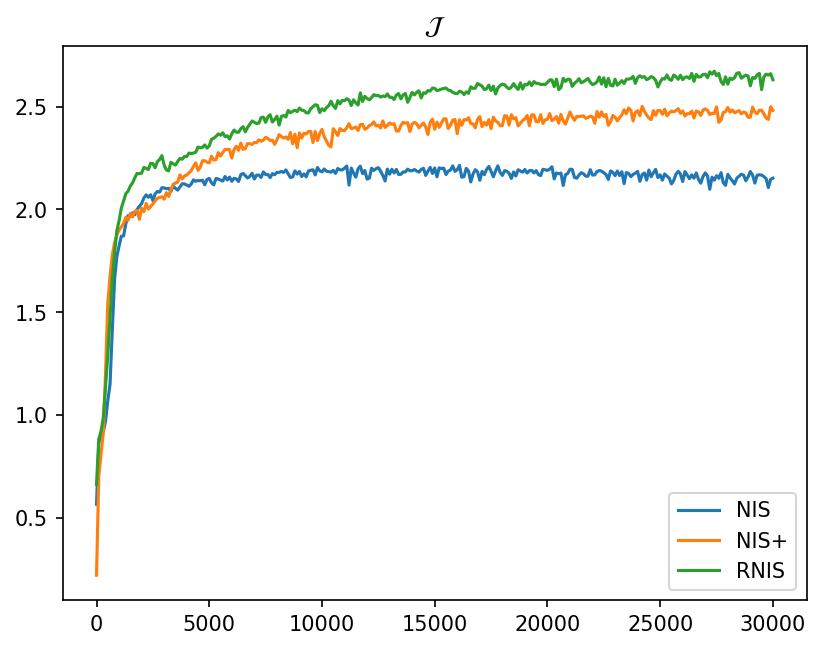

In [15]:
plt.figure(dpi=150)
timeseries = np.arange(len(trainer.eis))*100
plt.plot(timeseries, eis_nis, label='NIS')
plt.plot(timeseries, eis_nisp, label='NIS+')
plt.plot(timeseries, eis_rnis, label='RNIS')
plt.title(r'$\mathcal{J}$')
plt.legend()
plt.show()

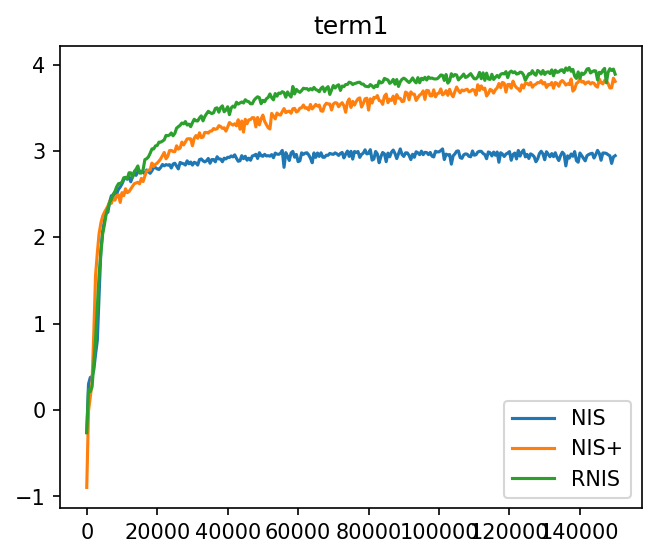

In [16]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis))*500
plt.plot(timeseries, term1s_nis, label='NIS')
plt.plot(timeseries, term1s_nisp, label='NIS+')
plt.plot(timeseries, term1s_rnis, label='RNIS')
plt.title(r'term1')
plt.legend()
# plt.yscale('log')
plt.show()

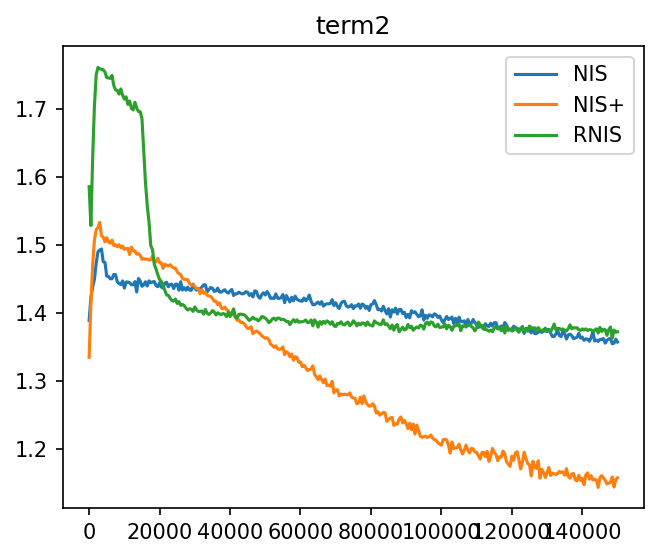

In [17]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis))*500
plt.plot(timeseries, term2s_nis, label='NIS')
plt.plot(timeseries, term2s_nisp, label='NIS+')
plt.plot(timeseries, term2s_rnis, label='RNIS')
plt.title(r'term2')
plt.legend()
# plt.yscale('log')
plt.show()

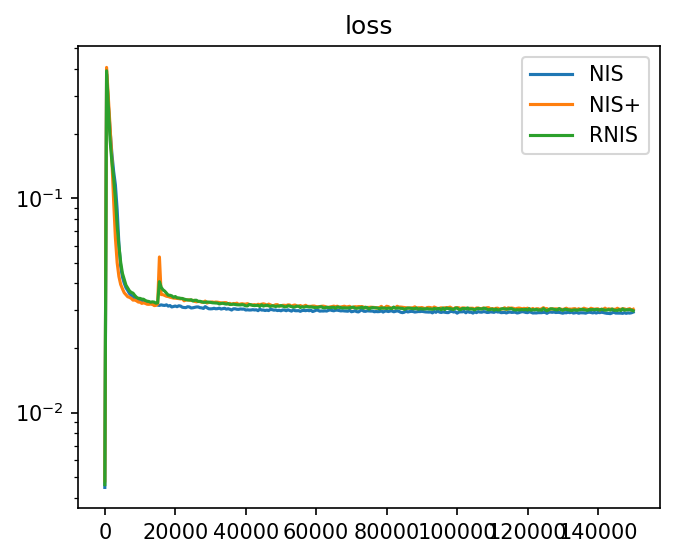

In [18]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis))*500
plt.plot(timeseries, losses_nis, label='NIS')
plt.plot(timeseries, losses_nisp, label='NIS+')
plt.plot(timeseries, losses_rnis, label='RNIS')
plt.title(r'loss')
plt.legend()
plt.yscale('log')
plt.show()